Вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [57]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16

In [58]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
train_images = tf.image.resize(train_images, (32, 32)) / 255.0
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
test_images = tf.image.resize(test_images, (32, 32)) / 255.0

In [59]:
# Завантаження базової моделі VGG16 без верхніх шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [60]:
# Створення моделі на основі VGG16
model = models.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [61]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               262656    
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 10)               

In [63]:
# Навчання моделі
epochs = 10
batch_size = 64
history_additional = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 41s 38ms/step - loss: 1.0360 - accuracy: 0.5771 - val_loss: 0.5320 - val_accuracy: 0.8045
Epoch 2/10
938/938 [==============================] - 40s 42ms/step - loss: 0.4939 - accuracy: 0.8318 - val_loss: 0.4114 - val_accuracy: 0.8652
Epoch 3/10
938/938 [==============================] - 35s 37ms/step - loss: 0.3717 - accuracy: 0.8799 - val_loss: 0.3251 - val_accuracy: 0.8908
Epoch 4/10
938/938 [==============================] - 35s 37ms/step - loss: 0.3277 - accuracy: 0.8934 - val_loss: 0.3852 - val_accuracy: 0.8753
Epoch 5/10
938/938 [==============================] - 34s 36ms/step - loss: 0.3036 - accuracy: 0.9019 - val_loss: 0.2946 - val_accuracy: 0.9015
Epoch 6/10
938/938 [==============================] - 35s 37ms/step - loss: 0.2886 - accuracy: 0.9068 - val_loss: 0.2975 - val_accuracy: 0.9003
Epoch 7/10
938/938 [==============================] - 34s 36ms/step - loss: 0.2633 - accuracy: 0.9149 - val_loss: 0.3627 - val_accuracy:

In [64]:
# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nТочність на тестових даних: {test_acc}")

313/313 - 2s - loss: 0.2773 - accuracy: 0.9105 - 2s/epoch - 8ms/step

Точність на тестових даних: 0.9104999899864197


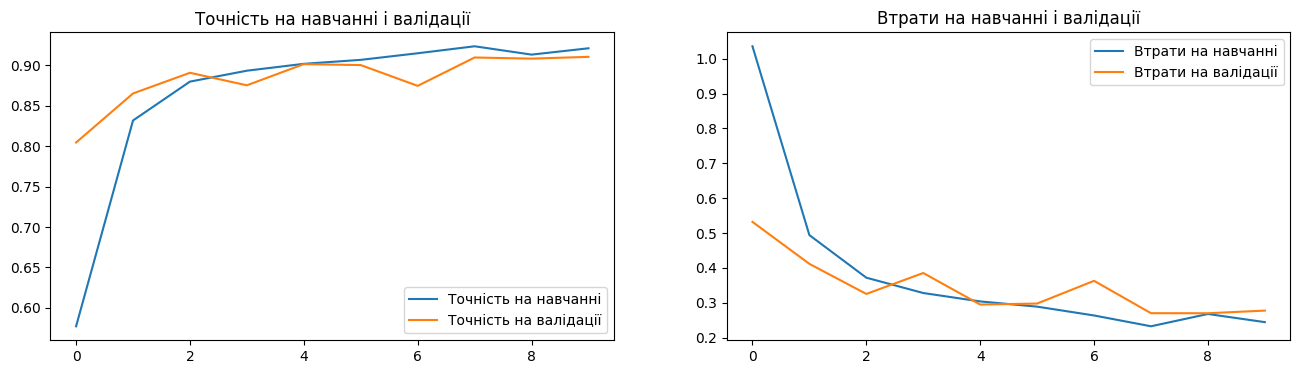

Epoch 10/15
1875/1875 [==============================] - 58s 28ms/step - loss: 0.1355 - accuracy: 0.9531 - val_loss: 0.2391 - val_accuracy: 0.9270
Epoch 11/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1304 - accuracy: 0.9551 - val_loss: 0.2390 - val_accuracy: 0.9263
Epoch 12/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1247 - accuracy: 0.9564 - val_loss: 0.2413 - val_accuracy: 0.9283
Epoch 13/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1213 - accuracy: 0.9579 - val_loss: 0.2439 - val_accuracy: 0.9278
Epoch 14/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1177 - accuracy: 0.9588 - val_loss: 0.2441 - val_accuracy: 0.9292
Epoch 15/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1144 - accuracy: 0.9604 - val_loss: 0.2508 - val_accuracy: 0.9292


In [69]:
acc = history_additional.history['accuracy']
val_acc = history_additional.history['val_accuracy']
loss = history_additional.history['loss']
val_loss = history_additional.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точність на навчанні')
plt.plot(epochs_range, val_acc, label='Точність на валідації')
plt.legend(loc='lower right')
plt.title('Точність на навчанні і валідації')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Втрати на навчанні')
plt.plot(epochs_range, val_loss, label='Втрати на валідації')
plt.legend(loc='upper right')
plt.title('Втрати на навчанні і валідації')

plt.show()

# Розмороження базової моделі VGG16 та донавчання (fine-tuning)
for layer in base_model.layers:
    layer.trainable = True

# Відновлення та компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Знову навчання моделі
fine_tune_epochs = 5
total_epochs = epochs + fine_tune_epochs

history_fine_tune = model.fit(train_images, train_labels, epochs=total_epochs, initial_epoch=history_additional.epoch[-1],
                             validation_data=(test_images, test_labels))

In [71]:
# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nТочність на тестових даних: {test_acc}")

313/313 - 3s - loss: 0.2508 - accuracy: 0.9292 - 3s/epoch - 9ms/step

Точність на тестових даних: 0.9291999936103821


### На основі даних ми можемо зробити наступні висновки:

### Convolutional Neural Network (CNN):

Точність моделі після 10+5 епох навчання на тестових даних становить приблизно 96%, що свідчить про високий рівень точності.
На валідаційних даних точність моделі становить 92.42%, що також є досить високим результатом.
Модель CNN має кращу загальну точність порівняно з Fully Connected Neural Network.

### Fully Connected Neural Network:

Точність моделі після 20 епох навчання на тестових даних становить близько 93.49%, що також є непоганим результатом, але нижчим порівняно з CNN.
Точність на валідаційних даних досягла близько 89.75% на останній епохі, що свідчить про меншу загальну точність в порівнянні з CNN.

## Загальні висновки:

Модель CNN демонструє вищий рівень точності як на тестових, так і на валідаційних даних, порівняно з Fully Connected Neural Network. Це свідчить про те, що використання згорткових нейронних мереж для завдань обробки зображень дозволяє досягнути кращих результатів.
Fully Connected Neural Network також досягає досить високої точності, але в порівнянні з CNN, вона виявляється менш ефективною у вирішенні завдань класифікації зображень.
Загалом, для завдань класифікації зображень, особливо на великих наборах даних, CNN є більш підходящим вибором і зазвичай дає кращі результати завдяки своїм спеціалізованим згортковим та пулінговим шарам для виявлення різних ознак в зображеннях.